In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
df = pd.read_excel("AVH.xlsx")
print(df.head())

print(df.shape)

   Date/Time  Weekday        CDD  HDD         DD  CHWton*hrs  ELECkWh  \
0 2020-07-01        4  22.372673  0.0 -22.372673   1526.3090   2014.0   
1 2020-07-02        5  24.483854  0.0 -24.483854   1662.5252   2110.0   
2 2020-07-06        2  27.820660  0.0 -27.820660   1972.9905   2194.0   
3 2020-07-07        3  28.595104  0.0 -28.595104   1782.8237   2128.0   
4 2020-07-08        4  30.337639  0.0 -30.337639   1824.8944   2138.0   

    STEAMLB     CHWkBTU  ELECkBTU  STEAMkBTU  Day Type       TEMP     SUMkBTU  
0  4598.190 -18315.7080  6871.768   4598.190         0  77.372673  -6845.7500  
1  4549.788 -19950.3024  7199.320   4549.788         0  79.483854  -8201.1944  
2  3791.490 -23675.8860  7485.928   3791.490         0  82.820660 -12398.4680  
3  4025.433 -21393.8844  7260.736   4025.433         0  83.595104 -10107.7154  
4  4001.232 -21898.7328  7294.856   4001.232         0  85.337639 -10602.6448  
(730, 14)


In [3]:
# Split dataset to weekday and weekend datasets
df_weekday = df[df["Weekday"] <= 5]
df_weekend = df[df["Weekday"] > 5]

# Split last 30 rows as test set for plotting purposes
df_weekday_test = df_weekday.iloc[-30:]
weekday_train_length = df_weekday.shape[0] - df_weekday_test.shape[0]
df_weekday_train = df_weekday.iloc[0:weekday_train_length]
df_weekend_test = df_weekend.iloc[-30:]
weekend_train_length = df_weekend.shape[0] - df_weekend_test.shape[0]
df_weekend_train = df_weekend.iloc[0:weekend_train_length]

print(df_weekday.shape)
print(df_weekend.shape)
print(df_weekday_train.shape)
print(df_weekday_test.shape)
print(df_weekend_train.shape)
print(df_weekend_test.shape)

(517, 14)
(213, 14)
(487, 14)
(30, 14)
(183, 14)
(30, 14)


In [4]:
# Define X and Y in a linear regression
X_weekday_train = df_weekday_train[["TEMP"]]
X_weekday_test = df_weekday_test[["TEMP"]]
X_weekend_train = df_weekend_train[["TEMP"]]
X_weekend_test = df_weekend_test[["TEMP"]]
Y_weekday_train = df_weekday_train[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekday_test = df_weekday_test[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekend_train = df_weekend_train[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]
Y_weekend_test = df_weekend_test[["CHWkBTU", "ELECkBTU", "STEAMkBTU", "SUMkBTU"]]

Coefficient:  -316.5633014832989 , Intercept:  9363.789332038445
R^2 Train:  0.7229817084621079
MAPE Train:  0.40187708109060893
R^2 Test:  0.6292548695899924
MAPE Test:  0.8160354520111849


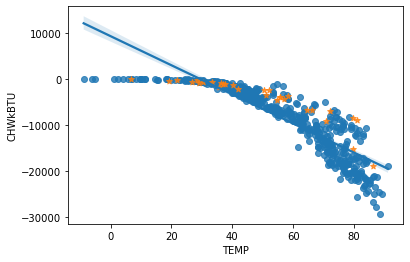

Coefficient:  0.3020555124505276 , Intercept:  6498.203081947525
R^2 Train:  -18448.11691579502
MAPE Train:  0.10353021324693686
R^2 Test:  -46406.98222265011
MAPE Test:  0.18408812603985045


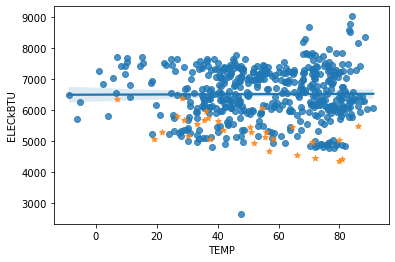

Coefficient:  -232.65584949061628 , Intercept:  21828.0340217192
R^2 Train:  0.6851844128183829
MAPE Train:  0.2774857510514957
R^2 Test:  0.2617045872210203
MAPE Test:  0.30396849688992056


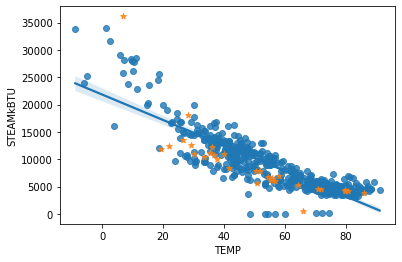

Coefficient:  -548.9170954614646 , Intercept:  37690.026435705164
R^2 Train:  0.9247980651362934
MAPE Train:  0.7188360215989754
R^2 Test:  0.8648088763370637
MAPE Test:  0.40577211095341276


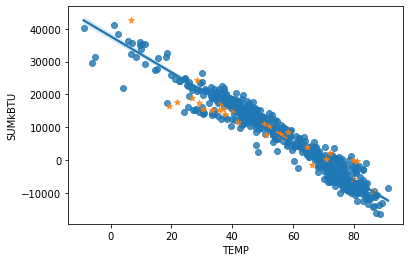

In [6]:
# Plot linear regression using for loop
max_r = 4
df_highlight = pd.DataFrame()

for i in range(max_r):
    lr = LinearRegression()
    lr.fit(X_weekday_train,Y_weekday_train.iloc[:,i])
    print("Coefficient: ", lr.coef_[0],", Intercept: ", lr.intercept_)
    ypred_train = lr.predict(X_weekday_train)
    ypred_test = lr.predict(X_weekday_test)
    print("R^2 Train: ", r2_score(ypred_train, Y_weekday_train.iloc[:,i]))
    print("MAPE Train: ", mean_absolute_percentage_error(ypred_train, Y_weekday_train.iloc[:,i]))
    print("R^2 Test: ", r2_score(ypred_test, Y_weekday_test.iloc[:,i]))
    print("MAPE Test: ", mean_absolute_percentage_error(ypred_test, Y_weekday_test.iloc[:,i]))
            #index = X_weekday_test.iloc[j][0]
    sns.regplot(x=X_weekday_train, y=Y_weekday_train.iloc[:,i])
    sns.regplot(x=X_weekday_test, y=Y_weekday_test.iloc[:,i], marker='*', fit_reg=False)
    plt.show()

    MAPE = mean_absolute_percentage_error(ypred_test, Y_weekday_test.iloc[:,i])
    for j in range(len(X_weekday_test)):
        #print(X_weekday_test.iloc[j])
        k = len(X_weekday_train) + j
        if (abs(Y_weekday_test.iloc[j,i] - ypred_test[j])) > MAPE:
            df_highlight = pd.concat([df_highlight, df_weekday_test.iloc[j]], axis=1)
            

In [ ]:
# Plot linear regression using for loop
for i in range(max_r):
    lr = LinearRegression()
    lr.fit(X_weekend_train,Y_weekend_train.iloc[:,i])
    print("Coefficient: ", lr.coef_[0],", Intercept: ", lr.intercept_)
    ypred_train = lr.predict(X_weekend_train)
    ypred_test = lr.predict(X_weekend_test)
    print("R^2 Train: ", r2_score(ypred_train, Y_weekend_train.iloc[:,i]))
    print("MAPE Train: ", mean_absolute_percentage_error(ypred_train, Y_weekend_train.iloc[:,i]))
    print("R^2 Test: ", r2_score(ypred_test, Y_weekend_test.iloc[:,i]))
    print("MAPE Test: ", mean_absolute_percentage_error(ypred_test, Y_weekend_test.iloc[:,i]))
    #plt.scatter(X_weekday,Y_weekday.iloc[:,i], color='green')
    sns.regplot(x=X_weekend_train, y=Y_weekend_train.iloc[:,i])
    sns.regplot(x=X_weekend_test, y=Y_weekend_test.iloc[:,i], marker='*', fit_reg=False)
    plt.show()

In [ ]:
df_highlight